In [6]:
import numpy as np
import pandas as pd
import sys

import matplotlib.pyplot as plt

from imp import reload
import stochasticgrowth_eventline as sge
sge=reload(sge)

%matplotlib notebook

In [8]:
p = sge.Population()

print(p.events)

p.growth(divisionevents = 500)


# EventLine Linked Lists, collected 5 events, maximum time: 1.1243117129761313, current time: None


<IPython.core.display.Javascript object>


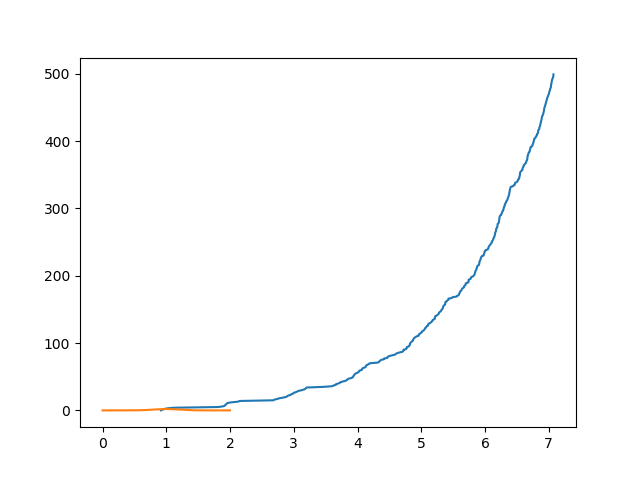

In [9]:
d = p.divisiondata

plt.plot(d['times'],d['populationsize'])

<IPython.core.display.Javascript object>


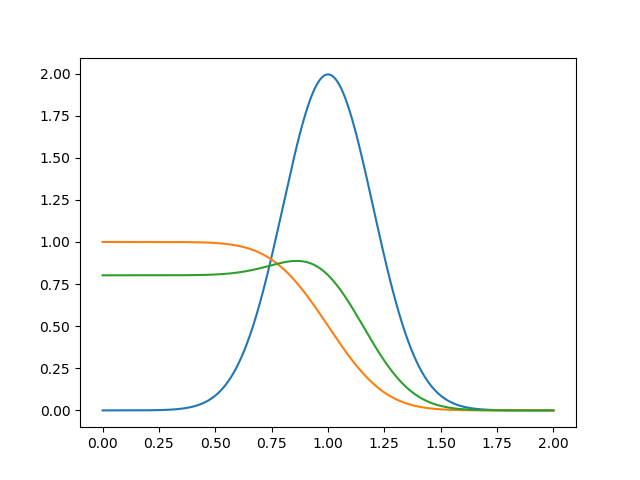

In [24]:
def gauss(x,mean = 0,var = 1):
    return np.exp(-0.5*(x-mean)**2/var)/np.sqrt(2*np.pi*var)


t = np.linspace(0,2,num=1000)
dtd = gauss(t,1,4e-2)

sumdtd = [np.sum(dtd[i:])*(t[1]-t[0]) for i in range(len(t))]

allshifts = np.zeros((len(t),len(t)))
for i in range(len(t)):
    allshifts[i,i:] = dtd[i:]/sumdtd[i]

#remainingtime = [np.concatenate([dtd[i:],np.zeros(len(t)-i)])/sumdtd[i] for i in range(len(t))]

remainingtime = np.dot(allshifts,dtd)/(np.sum(np.dot(allshifts,dtd))*(t[1]-t[0]))

plt.plot(t,dtd)
plt.plot(t,sumdtd)
plt.plot(t,remainingtime)
#plt.yscale('log')